# Visualización de datos

Leeremos nuestro archivo y renombraremos las columnas de la misma manera que lo hicimos en la practica pasada

In [18]:
import pandas as pd
import numpy as np

datos = pd.read_csv("SUICIDIOS.csv")

In [19]:
datos.drop(['country-year'],axis = 1,inplace=True)
datos.drop(['HDI for year'],axis = 1,inplace=True)
datos.rename(columns={' gdp_for_year ($) ':'gdp_for_year','suicides/100k pop':'porcentaje_suicidios',
                     'gdp_per_capita ($)':'gdp_per_capita'},
               inplace=True)

### Información estadística básica

Empezamos sumando todos los elementos de la columna "suicides_no"

In [20]:
datos['suicides_no'].sum()

6748420

Obtenemos el promedio de la columna "suicides_no"

In [21]:
datos['suicides_no'].mean()

242.57440690150972

Calculamos la suma acumulada de la columna "suicides_no" fila por fila

In [22]:
datos['suicides_no'].cumsum()

0             21
1             37
2             51
3             52
4             61
          ...   
27815    6748286
27816    6748295
27817    6748355
27818    6748399
27819    6748420
Name: suicides_no, Length: 27820, dtype: int64

Resumen estadístico de la columna "suicides_no"

In [23]:
datos['suicides_no'].describe()

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64

Contamos cuantos elementos no nulos hay en la columna ...

In [24]:
datos['porcentaje_suicidios'].count()

27820

Obtenemos el minimo y máximo de una columna ...

In [25]:
datos['porcentaje_suicidios'].min()

0.0

In [26]:
datos['porcentaje_suicidios'].max()

224.97

Otenemos la mediana, la varianza y la desviaicon estandar  de la columna suicides_no

In [27]:
datos['suicides_no'].median()

25.0

In [29]:
datos['suicides_no'].var()

813690.4442639275

In [30]:
datos['suicides_no'].std()

902.04791683365

Otenemos la mediana, la varianza y la desviaicon estandar  de la columna porcentaje_suicidios

In [31]:
datos['porcentaje_suicidios'].median()

5.99

In [32]:
datos['porcentaje_suicidios'].var()

359.53889995312005

In [33]:
datos['porcentaje_suicidios'].std()

18.96151101450304

Sacamos el valor de simetria de una columna

In [34]:
datos['porcentaje_suicidios'].skew()

2.963414476605633

In [35]:
datos['porcentaje_suicidios'].kurt

<bound method Series.kurt of 0        6.71
1        5.19
2        4.83
3        4.59
4        3.28
         ... 
27815    2.96
27816    2.58
27817    2.17
27818    1.67
27819    1.46
Name: porcentaje_suicidios, Length: 27820, dtype: float64>

Se busca la correlacion entre los datos

In [36]:
datos.corr()

,year,suicides_no,population,porcentaje_suicidios,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
porcentaje_suicidios,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,1.000000


Se busca la covarianza de los datos

In [37]:
datos.cov()

,year,suicides_no,population,porcentaje_suicidios,gdp_per_capita
year,71.724893,-3.472881e+01,2.931979e+05,-6.268766,5.424789e+04
suicides_no,-34.728813,8.136904e+05,2.174198e+09,5244.221253,1.044906e+06
population,293197.948494,2.174198e+09,1.530202e+13,614523.369015,6.022277e+09
porcentaje_suicidios,-6.268766,5.244221e+03,6.145234e+05,359.538900,6.393224e+02
gdp_per_capita,54247.893806,1.044906e+06,6.022277e+09,639.322444,3.567405e+08


### Graficar datos univariantes.
#### Grafica de barras y datos categoricos:

Mandamos llamar la columna country, para hacer nuestra grafica de barras , y ya que sus valores son los nombres de los paises y estos datos no son numericos agregamos value_counts

In [38]:
datos['country'].value_counts().plot.bar()

Ya que no se puden distinguir bien los paises , solo mostraremos una parte de la gráfica

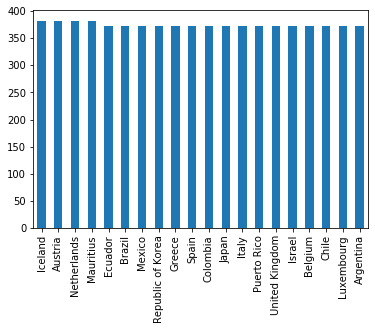

In [39]:
datos['country'].value_counts().head(20).plot.bar()

Aqui vemos que realmente la grafica está muy pareja , aunque el mayor numero de suicidios lo tiene Austria vemos que no tiene mucha diferncia a la cantidad de suicidios de los demas paises .

Y ahora para ver porcentajes, pero ahora queremos ver la proporcion en el eje de las y, en lugar de la cantidad. En la grafica de abajo ahora podemos ver que las proporciones tampoco difieren mucho con el porcentaje mas alto de Austria con menos de un 2%.

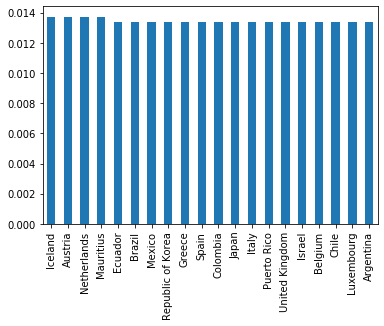

In [40]:
(datos['country'].value_counts().head(20) / len(datos)).plot.bar()

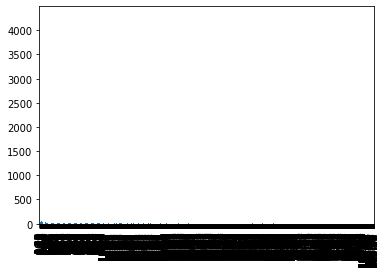

In [41]:
datos['porcentaje_suicidios'].value_counts().sort_index().plot.bar()

### Grafica de lineas.

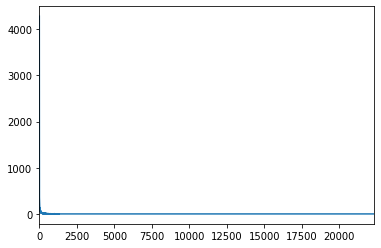

In [42]:
datos['suicides_no'].value_counts().sort_index().plot.line()

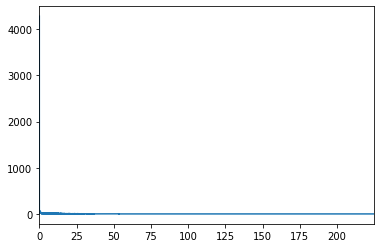

In [43]:
datos['porcentaje_suicidios'].value_counts().sort_index().plot.line()

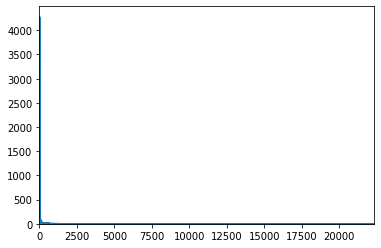

In [44]:
datos['suicides_no'].value_counts().sort_index().plot.area()

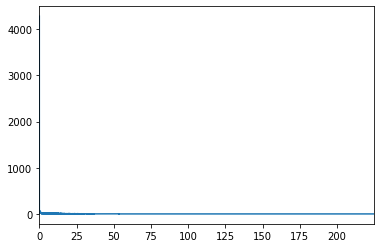

In [45]:
datos['porcentaje_suicidios'].value_counts().sort_index().plot.line()

### Histogramas

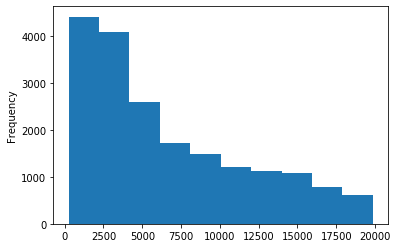

In [46]:
datos[datos['gdp_per_capita'] < 20000]['gdp_per_capita'].plot.hist()

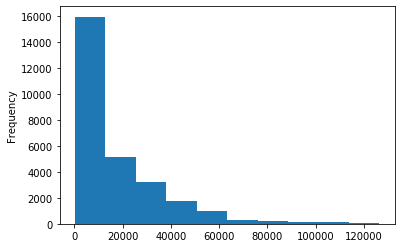

In [47]:
datos['gdp_per_capita'].plot.hist()

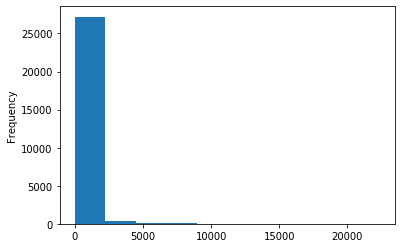

In [48]:
datos['suicides_no'].plot.hist()

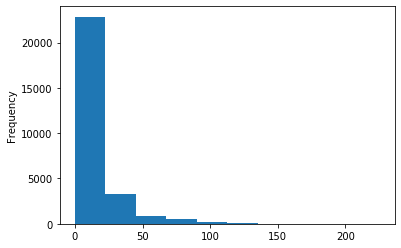

In [49]:
datos['porcentaje_suicidios'].plot.hist()

### Gráficas Bivariadas

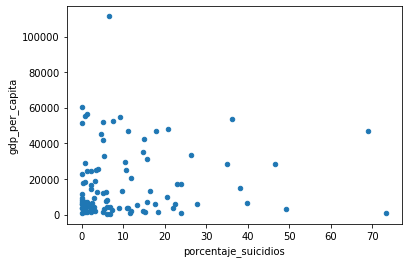

In [50]:
datos[datos['porcentaje_suicidios'] < 100].sample(100).plot.scatter(x='porcentaje_suicidios', y='gdp_per_capita')

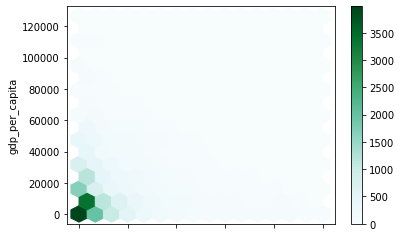

In [51]:
datos[datos['porcentaje_suicidios'] < 100].plot.hexbin(x='porcentaje_suicidios', y='gdp_per_capita', gridsize=15)

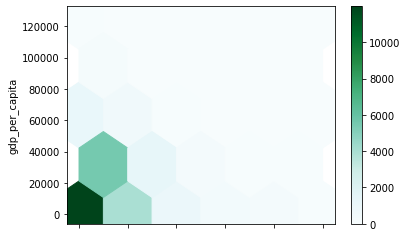

In [52]:
datos[datos['porcentaje_suicidios'] < 100].plot.hexbin(x='porcentaje_suicidios', y='gdp_per_capita', gridsize=5)

In [53]:
import seaborn as sns
suicidios = datos['suicides_no']
edad = datos["age"]
por = datos['porcentaje_suicidios']
perca = datos['gdp_per_capita']

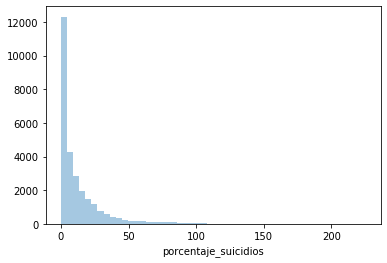

In [54]:
sns.distplot(por,kde=False)

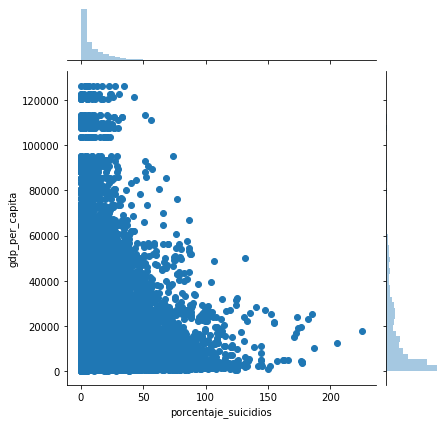

In [55]:
sns.jointplot(x=por, y=perca)

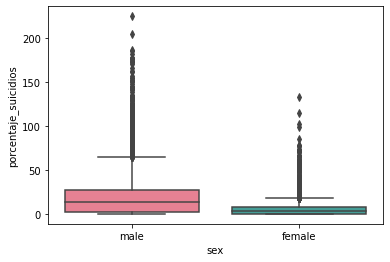

In [56]:
sns.boxplot(x=datos["sex"],y=por,palette="husl")

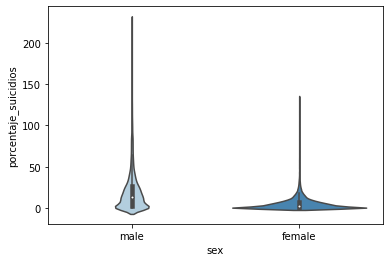

In [57]:
sns.violinplot(x=datos["sex"],y=por,palette="Blues")

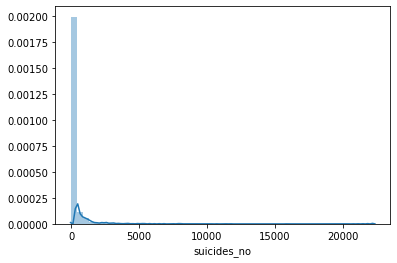

In [58]:
sns.distplot(suicidios)

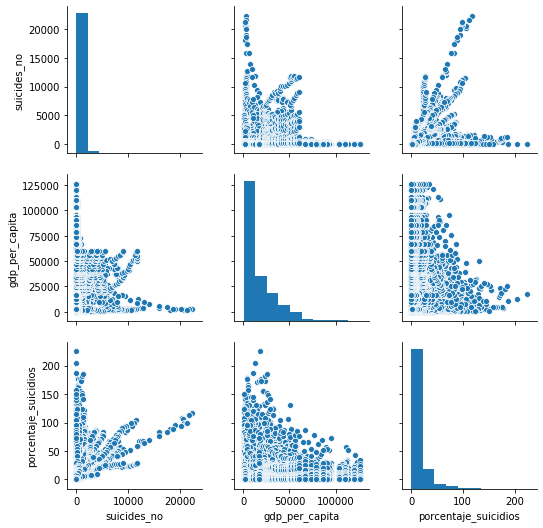

In [59]:
sns.pairplot(datos[['suicides_no','gdp_per_capita', 'porcentaje_suicidios']])